# Wine Quality Predictive Analysis

In [54]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r"C:\Users\len\Documents\TU\CIS 1051\wine quality analysis\winequality-red.csv")

In [55]:
df.shape

(1599, 12)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.duplicated().sum()

240

## Data distribution and visualization 

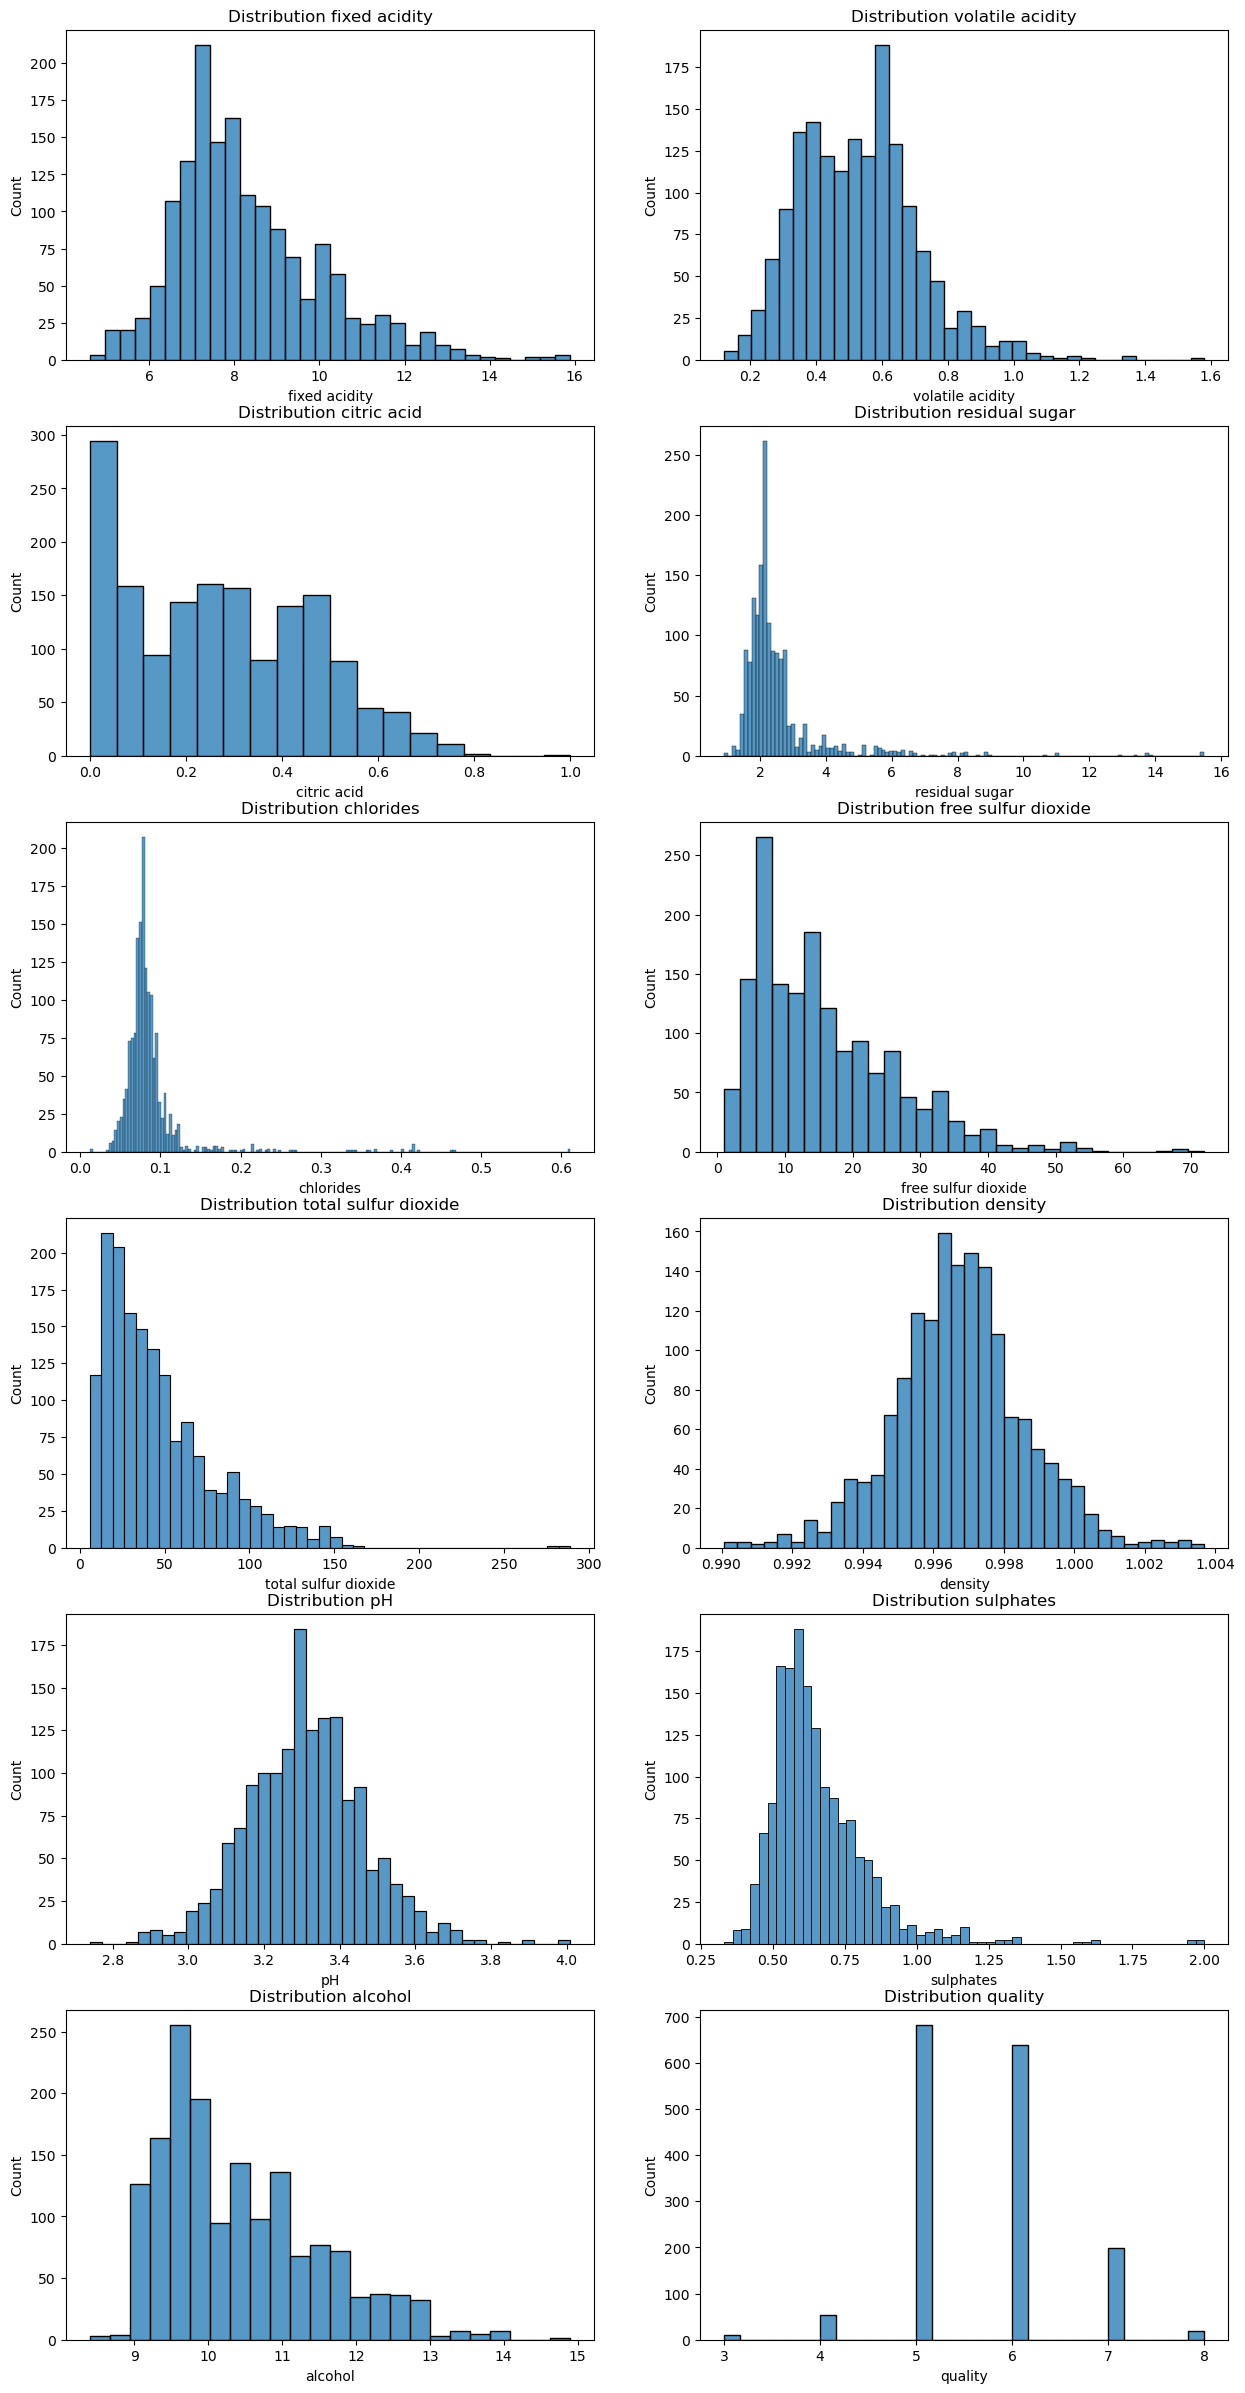

In [6]:
column_name = df.columns

len_columns = len(df.columns)
num_rows = int(len_columns/2)
num_cols = 2 

fig, axs = plt.subplots(nrows=num_rows, ncols = 2, figsize = (15, 5*num_rows))

for i,column in enumerate(df.columns):
    
    row = i // num_cols 
    col = i % num_cols
    
    sns.histplot(x = column, data = df,legend=False, ax = axs[row, col])
    axs[row, col].set_title(f"Distribution {column}")
    
plt.show()   

## Bar Plots feature vs Quality 

The graphs shows how quality is related to each chemical features

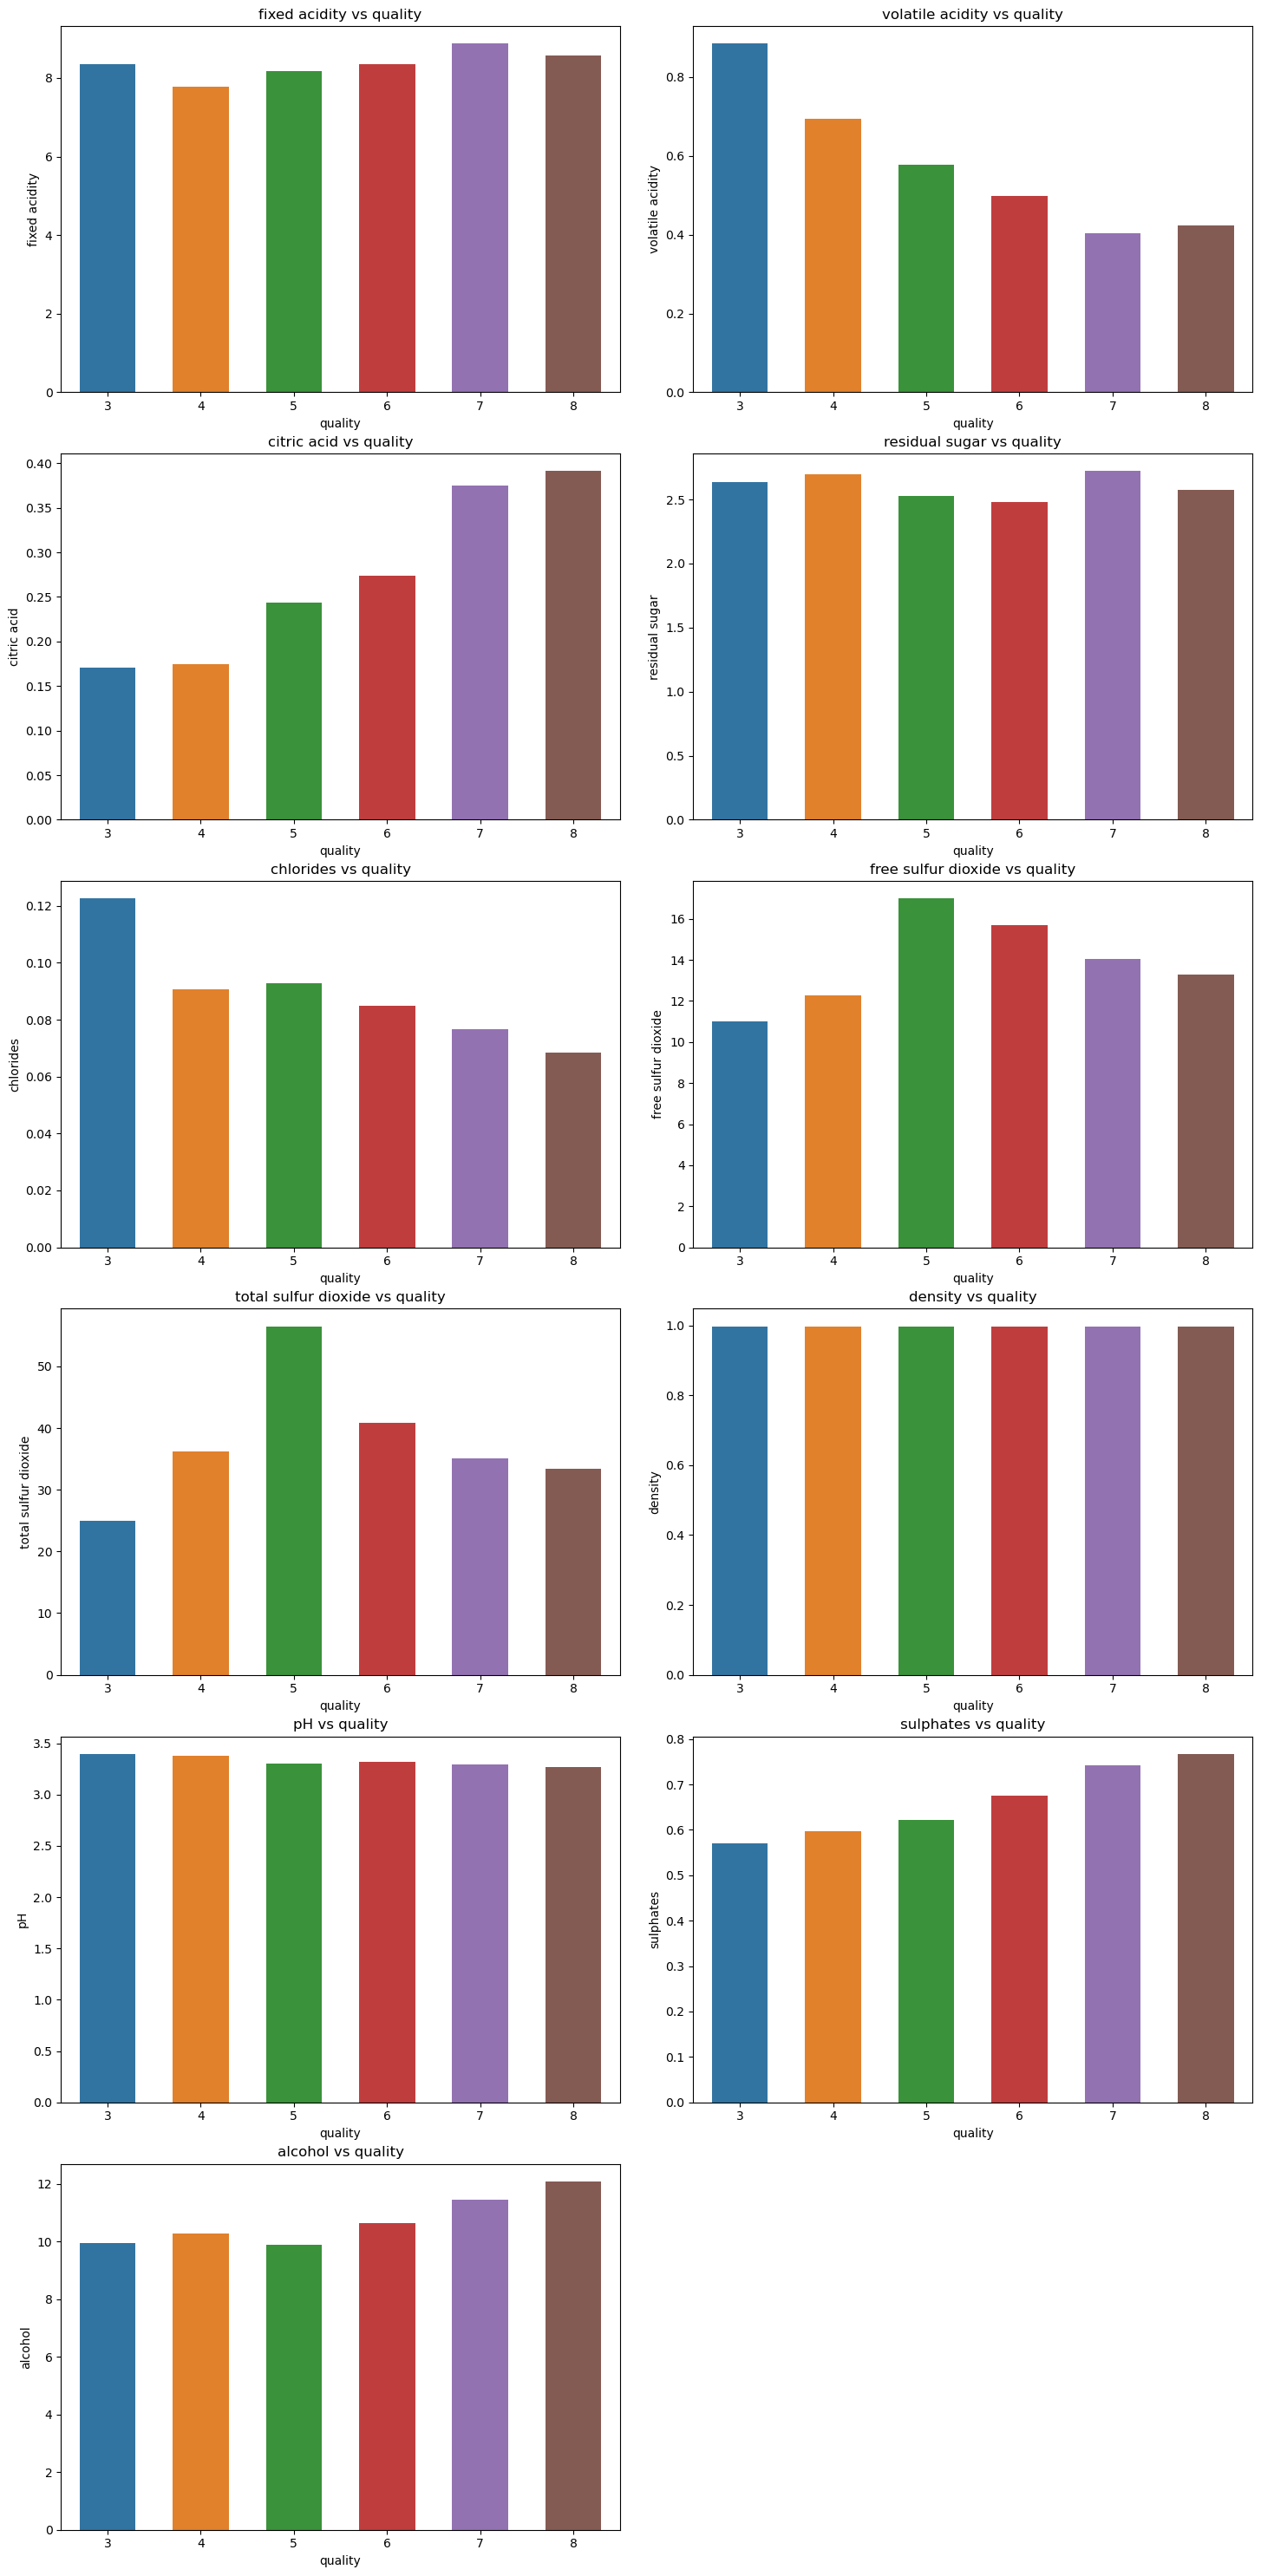

In [7]:
features = [col for col in df.columns if (df[col].dtype in ["int64", "float64"] and (df[col].nunique()>50)) ]


num_features = len(features) 
num_cols = 2 
num_rows = int(1+ num_features/2)



fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=3.0)  


for i, feature in enumerate(features):    
    row = i // num_cols
    col = i % num_cols
           
    sns.barplot(x = "quality", y = feature, data = df, width = 0.6, errorbar = None, ax = axs[row, col])
    axs[row, col].set_title(f'{feature} vs quality')
    
    
fig.delaxes(axs[5,1])    
    
plt.show()

## Box Plots and Scatters, features by quality  

These graphs are similar to the one before for data distribution . However the boxplots give a better insight onhow chemical feature affects quality and if there are correlation between features and quality. The scatterplots help in visualizing the data distribution.

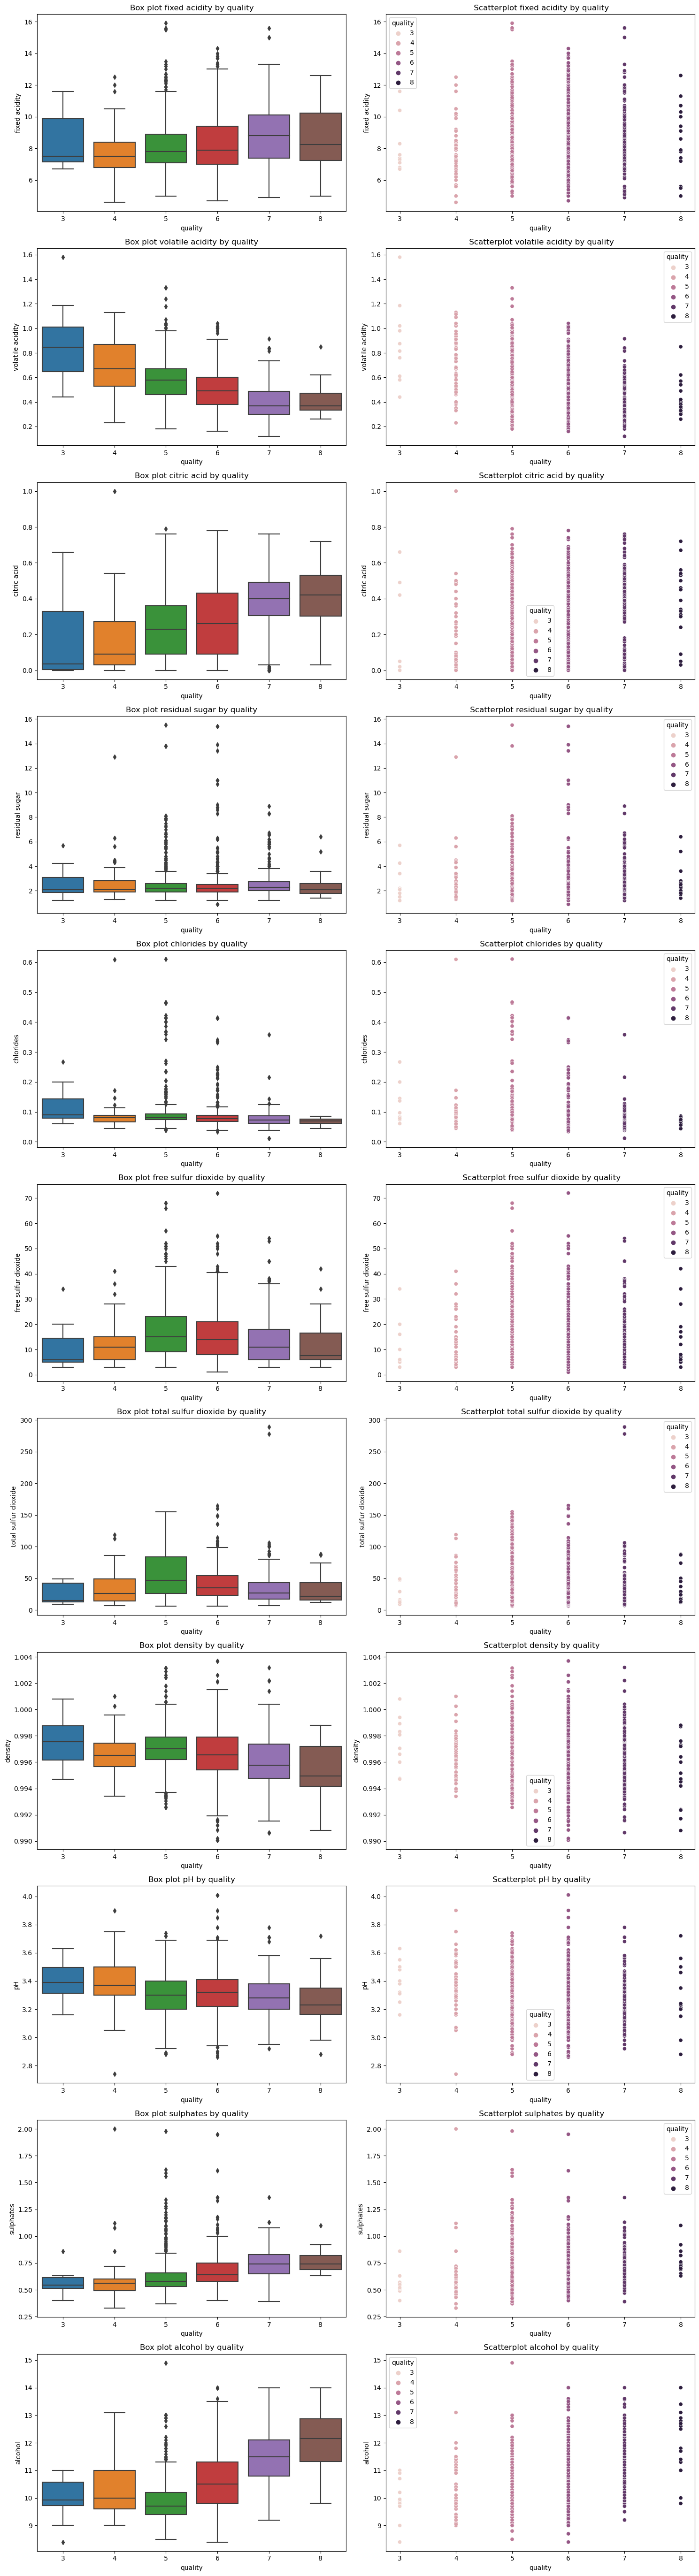

In [8]:
num_features = len(df.columns) - 1 
num_cols = 2 
num_rows = int(num_features)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15,5*num_rows))

for i, feature in enumerate(df.columns[:-1]):
    
    sns.boxplot(x = "quality", y = feature, data = df, ax = axs[i,0])
    axs[i,0].set_title(f"Box plot {feature} by quality")
    
    sns.scatterplot(x = "quality", y = feature, data = df, hue = "quality", ax = axs[i, 1])
    axs[i, 1].set_title(f" Scatterplot {feature} by quality")

plt.tight_layout()
plt.show()

## Feature plotting by quality compared with quality distribution 

The previous graphs showed some correlation between chemical features and quality. However I wanted to check if the of quality/feature matched the distribution of quality. Features that didn't seem to have a strong impact on quality were matching quality distribution (f.e. "total sulfur dioxide"), while features that seem to affect quality (f.e. "citric acid") weren't.

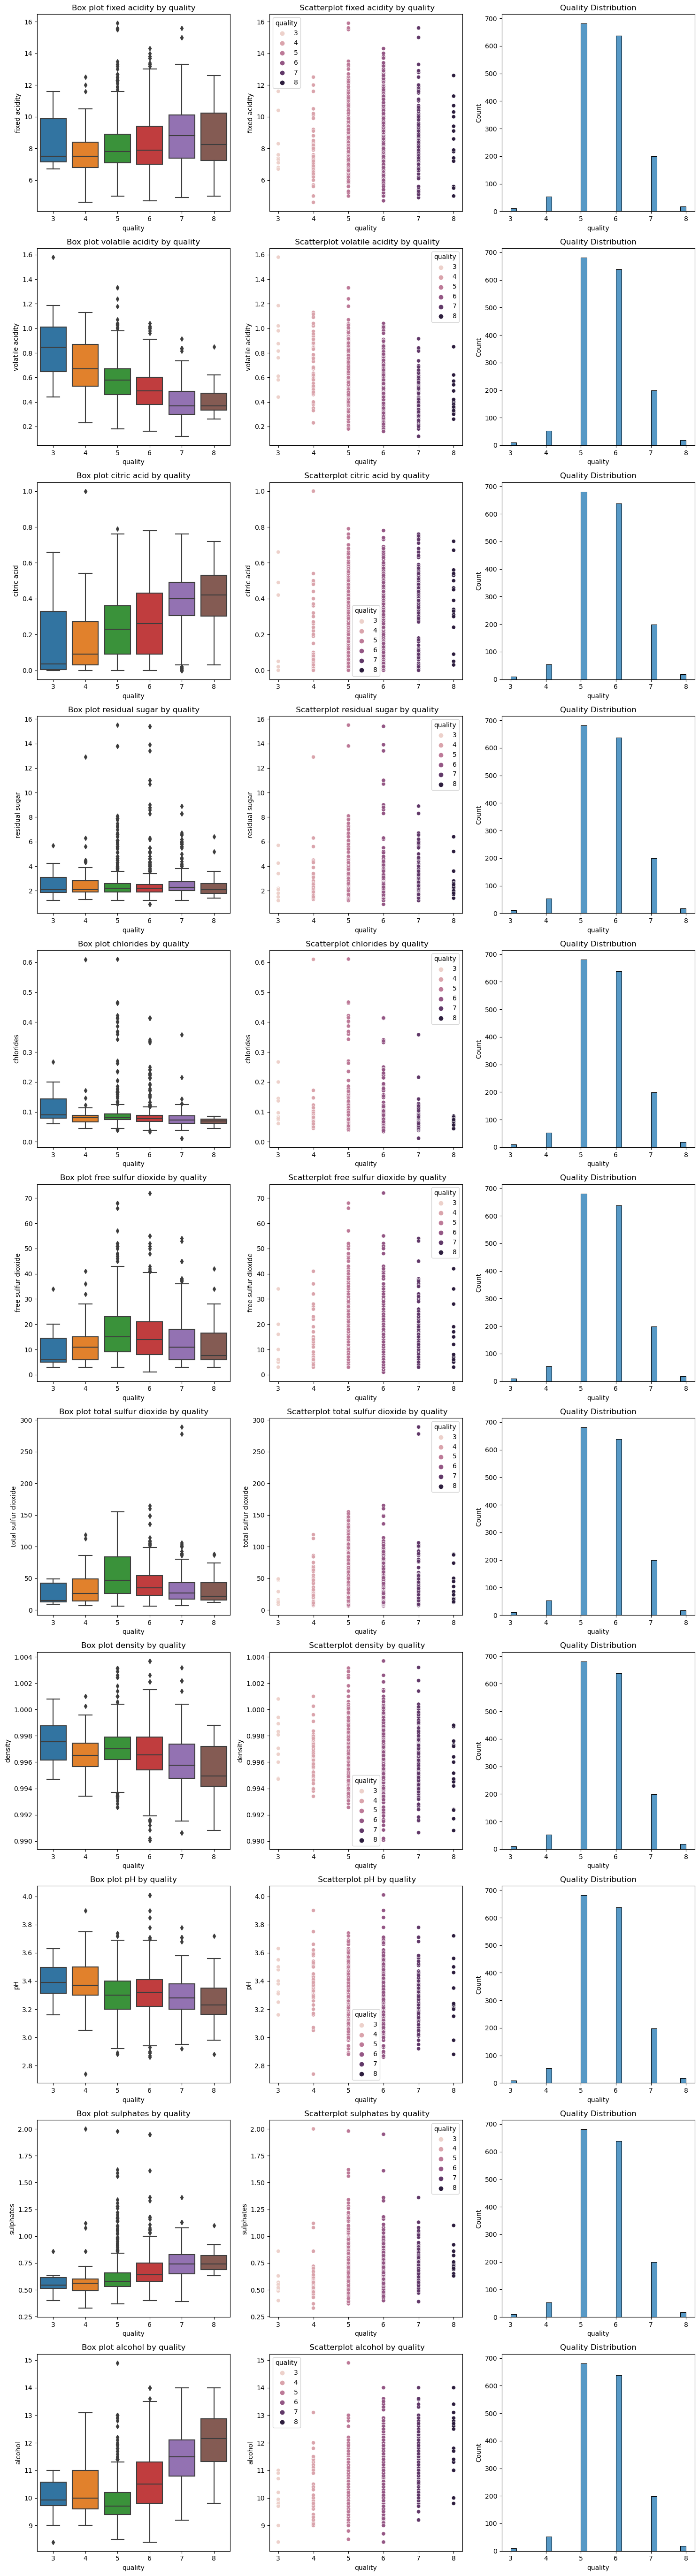

In [9]:
num_features = len(df.columns) - 1 
num_cols = 3 
num_rows = int(num_features)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15,5*num_rows))

for i, feature in enumerate(df.columns[:-1]):
    
    sns.boxplot(x = "quality", y = feature, data = df, ax = axs[i,0])
    axs[i,0].set_title(f"Box plot {feature} by quality")
    
    sns.scatterplot(x = "quality", y = feature, data = df, hue = "quality", ax = axs[i, 1])
    axs[i, 1].set_title(f" Scatterplot {feature} by quality")
    
    sns.histplot(x = "quality", data = df, ax = axs[i, 2])
    axs[i, 2].set_title(f"Quality Distribution")

plt.tight_layout()
plt.show()

## Quality feature regression 

I wanted to look more deeply into how each features was affecting the quality, therefore I decided to runa simple linear regression using chemical features as indipendent variable and quality as dependent variable.

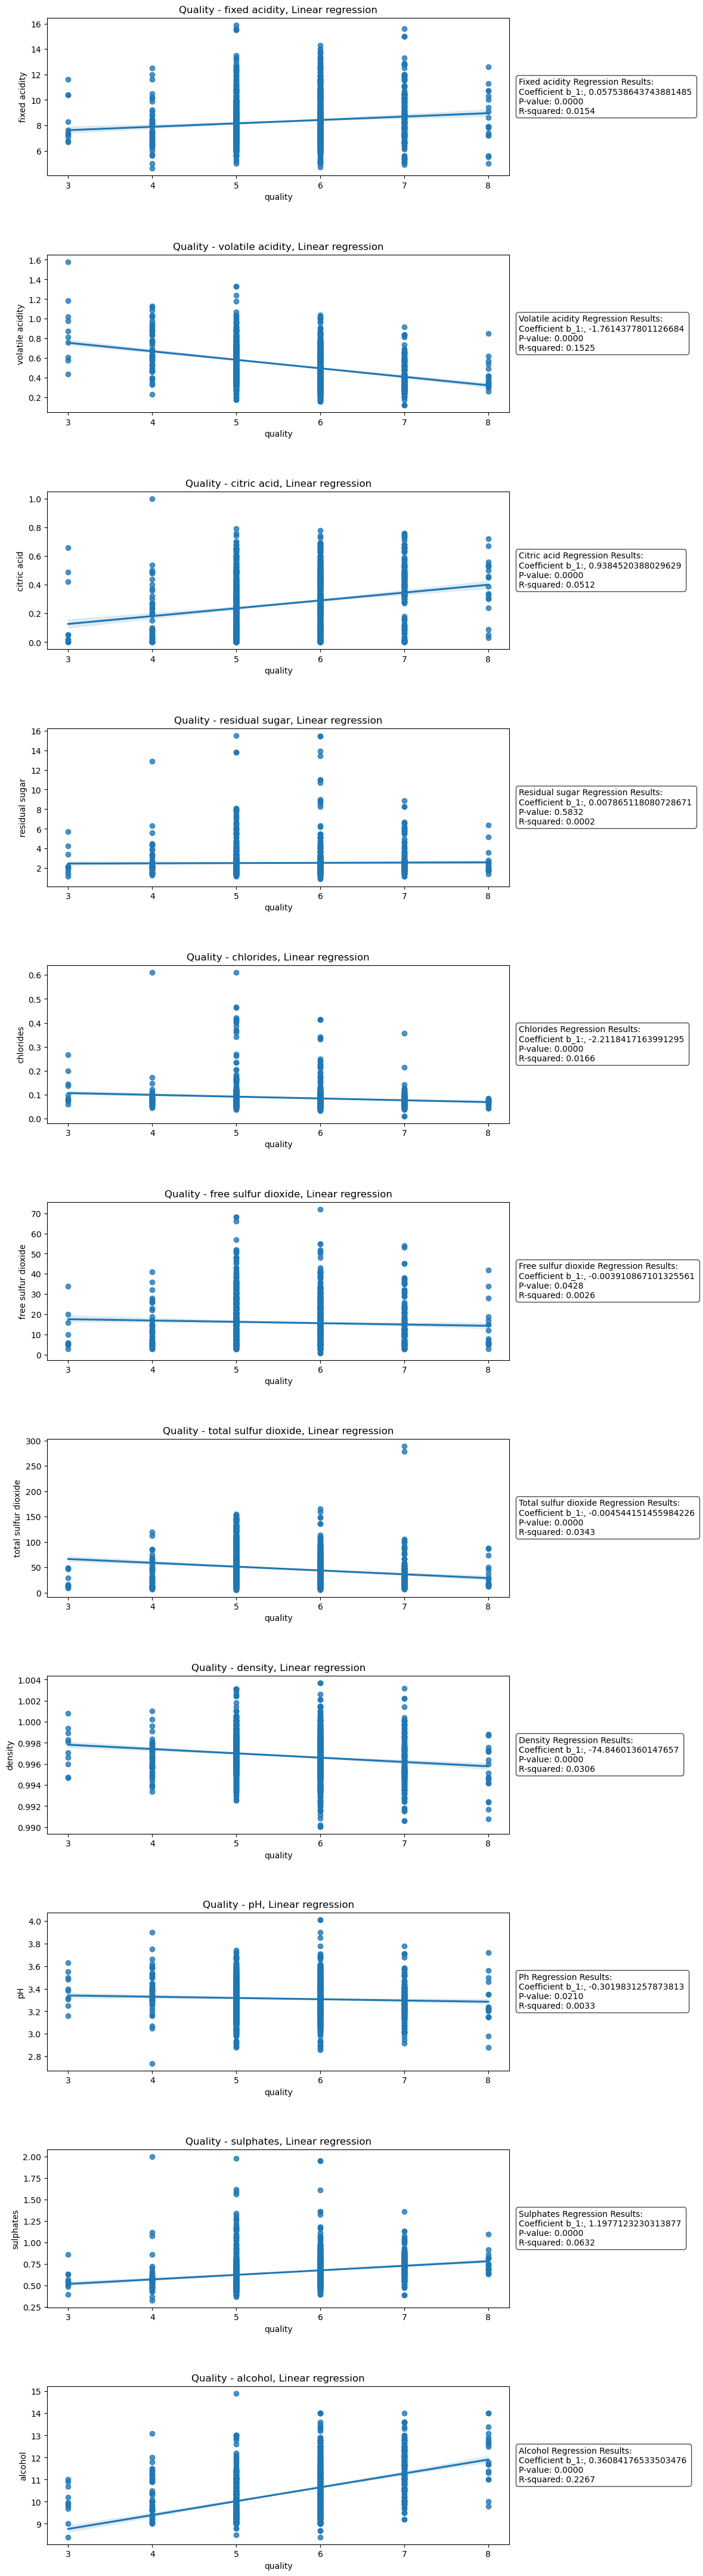

In [10]:
features = [col for col in df.columns if (df[col].dtype in ["int64", "float64"] and (df[col].nunique()>50)) ]

num_rows = int(len(features))
num_cols = 1

fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 5*num_rows))

for i, feature in enumerate(features):
    
    sns.regplot(x = df["quality"], y = df[feature], ax = axs[i])
    axs[i].set_title(f"Quality - {feature}, Linear regression")
    
    feature_array = df[feature].to_numpy()

    x = feature_array.reshape(-1,1)
    y = df["quality"]
    x = sm.add_constant(x)

    model = sm.OLS(y,x).fit()
    
    axs[i].text(1.02, 0.5, f"{feature.capitalize()} Regression Results:\n"
                           f"Coefficient b_1:, {model.params[1]} \n"
                            f"P-value: {model.pvalues.loc['x1']:.4f}\n"
                            f"R-squared: {model.rsquared:.4f}", transform=axs[i].transAxes,
                            ha='left', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
fig.subplots_adjust(hspace=0.5)
plt.show()
    

The low p-values for some features seem to show that there is a correlation between those features and quality however the low R-squared makes the model not useful as the fitted line doesn't seem to be working well with the spread of the data.

# Correlation Heatmap

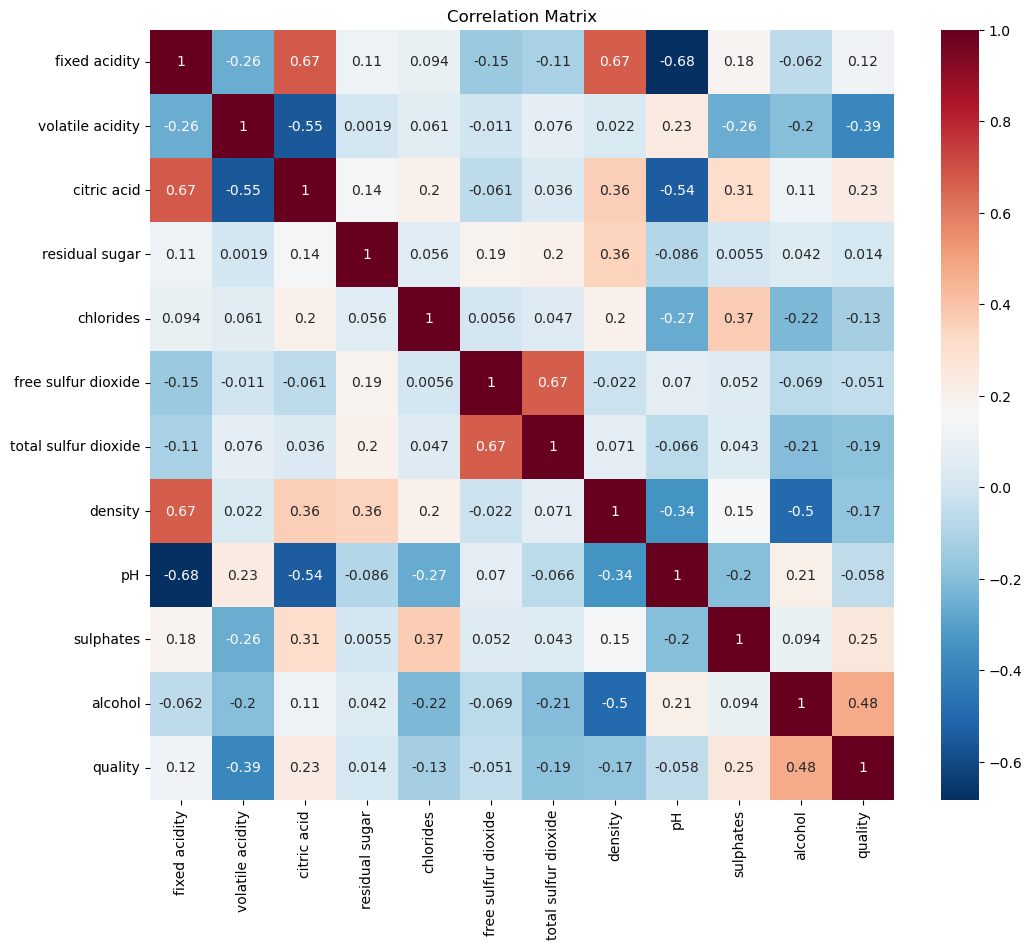

In [11]:
dati = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data = dati, annot = True, cmap="RdBu_r")
plt.title("Correlation Matrix")
plt.show()


# Target Value ("quality") distribution 

Text(0.5, 1.0, 'Quality distribution')

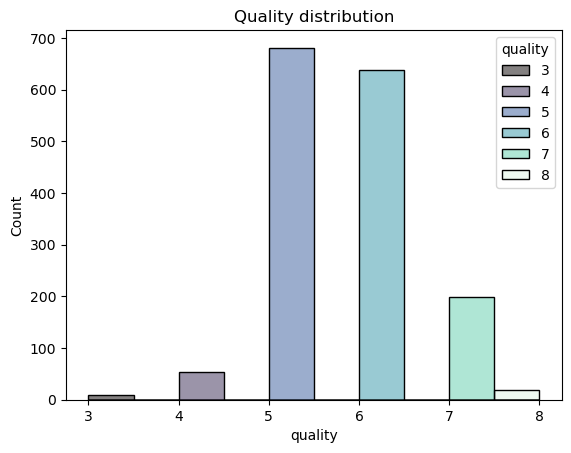

In [12]:
sns.histplot(x = "quality", data = df, binwidth= .5,hue = "quality", palette = "mako" , stat = "count")
plt.title("Quality distribution")

In [13]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Because of the result from the simple linear regression I decided to pursue a classification model. The target variable will be split in "good" or "bad" (0,1) this will help avoid the large data spread seen in the linear regression model and hopefully return a better prediction 

# Data preparation


In [14]:
data = df.copy()
data["quality"] = data["quality"].apply(lambda x: 1 if x > 5 else 0)
data.drop("alcohol", axis = 1)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

norm = MinMaxScaler()
pca = PCA(0.95)


# Logistic Regression 

In [15]:
model = make_pipeline(pca, norm, LogisticRegression())
model.fit(X_train, y_train)
scoreLogReg = model.score(X_train, y_train)

LogRegPred = model.predict(X_test)
LogRegAccuracy = accuracy_score(y_test, LogRegPred)
LogRegCR = classification_report(y_test, LogRegPred, zero_division = 1)
print(f"Logistic Regression Classification Report\n\n{LogRegCR}")


Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.69      0.32      0.44       148
           1       0.60      0.88      0.71       172

    accuracy                           0.62       320
   macro avg       0.65      0.60      0.57       320
weighted avg       0.64      0.62      0.58       320



# Decision Tree Classifier

In [16]:
model = make_pipeline(pca, norm, DecisionTreeClassifier())
model.fit(X_train, y_train)
scoreDTC = model.score(X_train, y_train)

DTCPred = model.predict(X_test)
DTCAccuracy = accuracy_score(y_test, DTCPred)
DTCCR = classification_report(y_test, DTCPred, zero_division = 1)
print(f"Decision Tree Classifier Classification Report\n\n {DTCCR}")



Decision Tree Classifier Classification Report

               precision    recall  f1-score   support

           0       0.63      0.59      0.61       148
           1       0.67      0.70      0.68       172

    accuracy                           0.65       320
   macro avg       0.65      0.65      0.65       320
weighted avg       0.65      0.65      0.65       320



# KNN Classifier 

In [17]:
model = make_pipeline(pca, norm, KNeighborsClassifier())
model.fit(X_train, y_train)
scoreKNN = model.score(X_train, y_train)

KNNPred = model.predict(X_test)
KNNAccuracy = accuracy_score(y_test, KNNPred)
KNNCR = classification_report(y_test, KNNPred)
print(f" Classification Report\n\n {KNNCR}")


 Classification Report

               precision    recall  f1-score   support

           0       0.59      0.60      0.60       148
           1       0.65      0.64      0.65       172

    accuracy                           0.62       320
   macro avg       0.62      0.62      0.62       320
weighted avg       0.62      0.62      0.62       320



# Random Forest Classifier 

In [18]:
model = make_pipeline(pca, norm, RandomForestClassifier())
model.fit(X_train, y_train)
scoreRF = model.score(X_train, y_train)

RFPred = model.predict(X_test)
RFAccuracy = accuracy_score(y_test, RFPred)
RFCR = classification_report(y_test, RFPred)
print(f"Random Forest Classification Report\n\n {RFCR}")

Random Forest Classification Report

               precision    recall  f1-score   support

           0       0.64      0.62      0.63       148
           1       0.68      0.70      0.69       172

    accuracy                           0.67       320
   macro avg       0.66      0.66      0.66       320
weighted avg       0.66      0.67      0.67       320



# Modeling Review 

KNN Classifier accuracy score: 62.18749999999999
Random Forest CLassifier accuracy score: 66.5625
Decision Tree Classifier accuracy score: 65.0
Logistic Rgression accuracy score: 61.875


<Axes: >

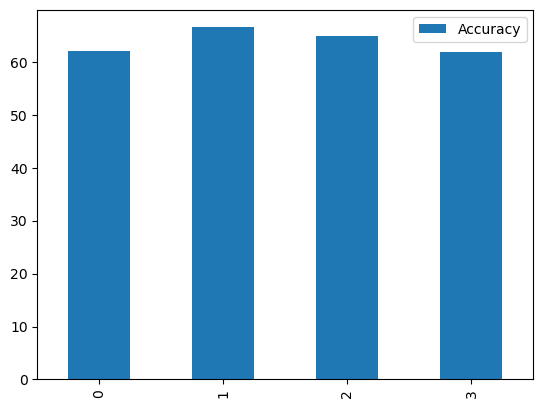

In [19]:
models = [KNNPred, RFPred, DTCPred, LogRegPred]
modelli = ["KNN Classifier", "Random Forest CLassifier", "Decision Tree Classifier", "Logistic Rgression"]
i = 0
accuracy_score = []

for model in models: 
    report = classification_report(y_test, model, output_dict = True)
    accuracy = report["accuracy"]*100
    
    accuracy_score.append(accuracy)
    modello = modelli[i]
    
    print(f"{modello} accuracy score: {accuracy}")
    i += 1
    
tabella = pd.DataFrame({"Model":modelli, "Accuracy": accuracy_score})
tabella.plot.bar()


# Conclusion 

The modelling seems to be working fine but is not as accurace as expected, therefore I decided to go over the modelling part again but after changing some features in the dataset: 
 
 -For the first additional modelling I decided to drop the alcohol feature since it's more that a charateristic of a certain wine than a feature (like being a red or white wine);
 
-Since it became a classification model that it's answering to the question "Is this wine good or not?", I decided to change the features in the binarization of the target variable. In the first model it was for x > 5 "good", else "bad". For the new modeling I decided to do for x > 6 "good", else "bad" and see hoow this will affect the overall accuracy score. 


# Data Preparation (alcohol dropped)

In [30]:
data = df.copy()
data.drop("alcohol", axis = 1)
data["quality"] = data["quality"].apply(lambda x: 1 if x > 5 else 0)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

norm = MinMaxScaler()
pca = PCA(0.95)

# Logistic Regression (alcohol dropped)

In [31]:
model = make_pipeline(pca, norm, LogisticRegression())
model.fit(X_train, y_train)
scoreLogReg = model.score(X_train, y_train)

LogRegPred = model.predict(X_test)
LogRegAccuracy = accuracy_score(y_test, LogRegPred)
LogRegCR = classification_report(y_test, LogRegPred)
print(f"Logistic Regression Classification Report:\n\n{LogRegCR}")

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.32      0.44       148
           1       0.60      0.88      0.71       172

    accuracy                           0.62       320
   macro avg       0.65      0.60      0.57       320
weighted avg       0.64      0.62      0.58       320




# Decision Tree Classifier (alcohol dropped)

In [24]:
model = make_pipeline(pca, norm, DecisionTreeClassifier())
model.fit(X_train, y_train)
scoreDTC = model.score(X_train, y_train)

DTCPred = model.predict(X_test)
DTCAccuracy = accuracy_score(y_test, DTCPred)
DTCCR = classification_report(y_test, DTCPred)
print(f"Decision Tree Classifier Classification Report:\n\n {DTCCR}")

Decision Tree Classifier Classification Report:

               precision    recall  f1-score   support

           0       0.65      0.59      0.62       148
           1       0.67      0.72      0.70       172

    accuracy                           0.66       320
   macro avg       0.66      0.66      0.66       320
weighted avg       0.66      0.66      0.66       320



# KNN Classifier (alcohol dropped)

In [25]:
model = make_pipeline(pca, norm, KNeighborsClassifier())
model.fit(X_train, y_train)
scoreKNN = model.score(X_train, y_train)

KNNPred = model.predict(X_test)
KNNAccuracy = accuracy_score(y_test, KNNPred)
KNNCR = classification_report(y_test, KNNPred)
print(f"KNN Classification Report:\n\n {KNNCR}")

KNN Classification Report:

               precision    recall  f1-score   support

           0       0.59      0.60      0.60       148
           1       0.65      0.64      0.65       172

    accuracy                           0.62       320
   macro avg       0.62      0.62      0.62       320
weighted avg       0.62      0.62      0.62       320



# Modelling Review (alcohol dropped) 

KNN Classifier accuracy score: 62.18749999999999
Random Forest CLassifier accuracy score: 66.5625
Decision Tree Classifier accuracy score: 66.25
Logistic Rgression accuracy score: 61.875


<Axes: >

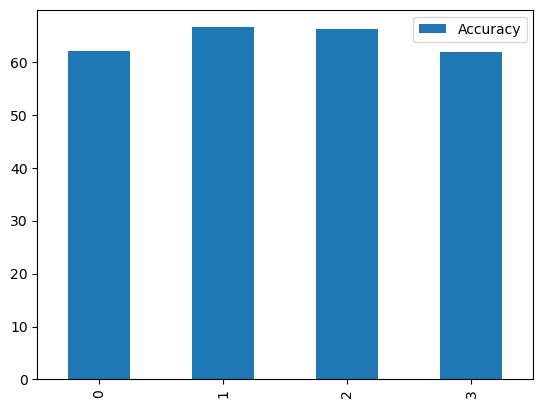

In [26]:
models = [KNNPred, RFPred, DTCPred, LogRegPred]

modelli = ["KNN Classifier", "Random Forest CLassifier", "Decision Tree Classifier", "Logistic Rgression"]
accuracy_score = []
i = 0
for model in models: 
    
    report = classification_report(y_test, model, output_dict = True)
    accuracy = report["accuracy"]*100
    
    accuracy_score.append(accuracy)
    modello = modelli[i]
    
    print(f"{modello} accuracy score: {accuracy}")
    i += 1
    
tabella = pd.DataFrame({"Model":modelli, "Accuracy": accuracy_score})
tabella.plot.bar()

The new modelling doesn't seem to be changing the accuracy a lot as the most performing model is still the Random Forest Classifier with an accuracy score of 66.25 %. 

# Additional Modelling (New Target Variable Binarization)

# Data Preparation 

In [27]:
data = df.copy()
data["quality"] = data["quality"].apply(lambda x: 1 if x > 6 else 0)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

norm = MinMaxScaler()
pca = PCA(0.95)

# Logistic Regression 

In [32]:
model = make_pipeline(pca, norm, LogisticRegression())
model.fit(X_train, y_train)
scoreLogReg = model.score(X_train, y_train)

LogRegPred = model.predict(X_test)
LogRegAccuracy = accuracy_score(y_test, LogRegPred)
LogRegCR = classification_report(y_test, LogRegPred)
print(f"Logistic Regression Classification Report:\n\n{LogRegCR}")

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.32      0.44       148
           1       0.60      0.88      0.71       172

    accuracy                           0.62       320
   macro avg       0.65      0.60      0.57       320
weighted avg       0.64      0.62      0.58       320



# Decision Tree Classifier

In [33]:
model = make_pipeline(pca, norm, DecisionTreeClassifier())
model.fit(X_train, y_train)
scoreDTC = model.score(X_train, y_train)

DTCPred = model.predict(X_test)
DTCAccuracy = accuracy_score(y_test, DTCPred)
DTCCR = classification_report(y_test, DTCPred)
print(f"Decision Tree Classifier Classification Report:\n\n {DTCCR}")

Decision Tree Classifier Classification Report:

               precision    recall  f1-score   support

           0       0.63      0.60      0.61       148
           1       0.67      0.69      0.68       172

    accuracy                           0.65       320
   macro avg       0.65      0.65      0.65       320
weighted avg       0.65      0.65      0.65       320



# Random Forest Classifier

In [34]:
model = make_pipeline(pca, norm, RandomForestClassifier())
model.fit(X_train, y_train)
scoreRF = model.score(X_train, y_train)

RFPred = model.predict(X_test)
RFAccuracy = accuracy_score(y_test, RFPred)
RFCR = classification_report(y_test, RFPred)
print(f"Random Forest Classification Report:\n\n {RFCR}")


Random Forest Classification Report:

               precision    recall  f1-score   support

           0       0.65      0.66      0.65       148
           1       0.70      0.70      0.70       172

    accuracy                           0.68       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.68      0.68      0.68       320



# KNN Classifier

In [35]:
model = make_pipeline(pca, norm, KNeighborsClassifier())
model.fit(X_train, y_train)
scoreKNN = model.score(X_train, y_train)

KNNPred = model.predict(X_test)
KNNAccuracy = accuracy_score(y_test, KNNPred)
KNNCR = classification_report(y_test, KNNPred)
print(f"KNN Classification Report:\n\n {KNNCR}")

KNN Classification Report:

               precision    recall  f1-score   support

           0       0.59      0.60      0.60       148
           1       0.65      0.64      0.65       172

    accuracy                           0.62       320
   macro avg       0.62      0.62      0.62       320
weighted avg       0.62      0.62      0.62       320



KNN Classifier accuracy score: 62.18749999999999
Random Forest CLassifier accuracy score: 67.8125
Decision Tree Classifier accuracy score: 65.0
Logistic Rgression accuracy score: 61.875


<Axes: >

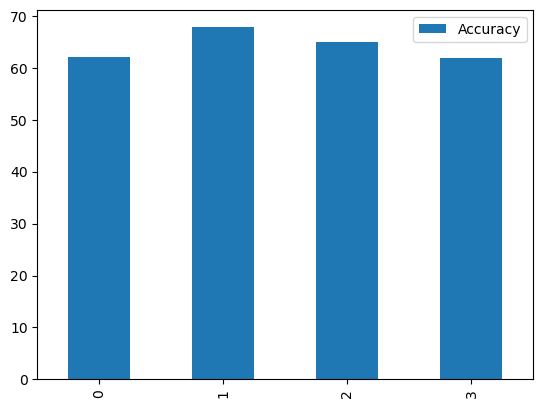

In [36]:
models = [KNNPred, RFPred, DTCPred, LogRegPred]

modelli = ["KNN Classifier", "Random Forest CLassifier", "Decision Tree Classifier", "Logistic Rgression"]
accuracy_score = []
i = 0
for model in models: 
    
    report = classification_report(y_test, model, output_dict = True)
    accuracy = report["accuracy"]*100
    
    accuracy_score.append(accuracy)
    modello = modelli[i]
    
    print(f"{modello} accuracy score: {accuracy}")
    i += 1
    
tabella = pd.DataFrame({"Model":modelli, "Accuracy": accuracy_score})
tabella.plot.bar()

The model seems to be performing better now and achieving higher accuracy but it struggles with predicting if a wine is good (quality = 1) because of the small amount of data. This new test showed the main issue with the model: with the right amount of data seems to be performing well but obviously with the small amount of data in this dataset will be underperforming 

# Changing the size of X_test and y_test

# Data Preparation 

In [46]:
df = pd.read_csv(r"C:\Users\len\Documents\TU\CIS 1051\wine quality analysis\winequality-red.csv")


data = df.copy()
data["quality"] = data["quality"].apply(lambda x: 1 if x > 6 else 0)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

norm = MinMaxScaler()
pca = PCA(0.95)

In [49]:
model = make_pipeline(pca, norm, LogisticRegression())
model.fit(X_train, y_train)
scoreLogReg = model.score(X_train, y_train)

LogRegPred = model.predict(X_test)
LogRegAccuracy = accuracy_score(y_test, LogRegPred)
LogRegCR = classification_report(y_test, LogRegPred)
print(f"Logistic Regression Classification Report:\n\n{LogRegCR}")


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       574
           1       0.00      0.00      0.00        66

    accuracy                           0.90       640
   macro avg       0.45      0.50      0.47       640
weighted avg       0.80      0.90      0.85       640



C:\Users\len\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\len\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\len\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
model = make_pipeline(pca, norm, DecisionTreeClassifier())
model.fit(X_train, y_train)
scoreDTC = model.score(X_train, y_train)

DTCPred = model.predict(X_test)
DTCAccuracy = accuracy_score(y_test, DTCPred)
DTCCR = classification_report(y_test, DTCPred)
print(f"Decision Tree Classifier Classification Report:\n\n {DTCCR}")

Decision Tree Classifier Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.88      0.90       574
           1       0.28      0.41      0.34        66

    accuracy                           0.83       640
   macro avg       0.61      0.65      0.62       640
weighted avg       0.86      0.83      0.85       640



In [51]:
model = make_pipeline(pca, norm, RandomForestClassifier())
model.fit(X_train, y_train)
scoreRF = model.score(X_train, y_train)

RFPred = model.predict(X_test)
RFAccuracy = accuracy_score(y_test, RFPred)
RFCR = classification_report(y_test, RFPred)
print(f"Random Forest Classification Report:\n\n {RFCR}")

Random Forest Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.92      0.92       574
           1       0.35      0.36      0.36        66

    accuracy                           0.86       640
   macro avg       0.64      0.64      0.64       640
weighted avg       0.87      0.86      0.87       640



In [52]:
model = make_pipeline(pca, norm, KNeighborsClassifier())
model.fit(X_train, y_train)
scoreKNN = model.score(X_train, y_train)

KNNPred = model.predict(X_test)
KNNAccuracy = accuracy_score(y_test, KNNPred)
KNNCR = classification_report(y_test, KNNPred)
print(f"KNN Classification Report:\n\n {KNNCR}")

KNN Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.93      0.92       574
           1       0.27      0.23      0.25        66

    accuracy                           0.86       640
   macro avg       0.59      0.58      0.58       640
weighted avg       0.85      0.86      0.85       640



KNN Classifier accuracy score: 85.625
Random Forest CLassifier accuracy score: 86.40625
Decision Tree Classifier accuracy score: 83.28125
Logistic Rgression accuracy score: 89.6875


C:\Users\len\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\len\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\len\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

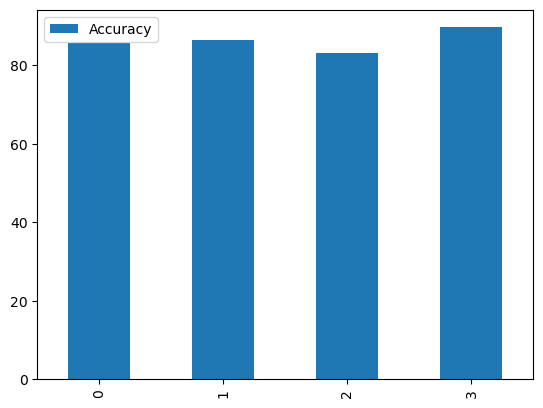

In [53]:
models = [KNNPred, RFPred, DTCPred, LogRegPred]

modelli = ["KNN Classifier", "Random Forest CLassifier", "Decision Tree Classifier", "Logistic Rgression"]
accuracy_score = []
i = 0
for model in models: 
    
    report = classification_report(y_test, model, output_dict = True)
    accuracy = report["accuracy"]*100
    
    accuracy_score.append(accuracy)
    modello = modelli[i]
    
    print(f"{modello} accuracy score: {accuracy}")
    i += 1
    
tabella = pd.DataFrame({"Model":modelli, "Accuracy": accuracy_score})
tabella.plot.bar()

This new model seems to be performing well but it still struggles in predicting "good" wines. Therefore, despite changing the train/test ratio the model is still underperforming due to the size of the dataset. Finding a larger data set would definetely help in achieving better accrucarcy score. 

# Conclusion

The predictive score achieved in the last set of models seems to show that the model is work when given a data set large enough. Despite not achieving high accuracy or precision scores I'm happy with how the model turned out and I would love to run the predictive analysis with a larger dataset. 